In [5]:
#!/usr/bin/env python3
import os
import json
import h5py
import argparse
import pandas as pd
import numpy as np
import tinydb as db
from tinydb.storages import MemoryStorage
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('./joule_dissertation.mplstyle')
from matplotlib.colors import LogNorm

import boost_histogram as bh
import pickle as pl

import scipy

from pygama import DataGroup
import pygama.lh5 as lh5
import pygama.analysis.histograms as pgh
import pygama.analysis.peak_fitting as pgf
import cage_utils
plt.rcParams['figure.figsize'] = [10, 8]

In [2]:
f_pulser = './data/CAGE_amp_long_transient_response.csv'

In [43]:
cols = ['time', 'v(out)', 'v(out2a)']
data_pulser=pd.read_csv(f_pulser, delimiter=' ,', header=0, names = cols)
raw_impulse = np.array(data_pulser['v(out2a)'])
raw_time = np.array(data_pulser['time'])
print(len(raw_impulse))

<ipython-input-43-0e437c8bf0c9>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_pulser=pd.read_csv(f_pulser, delimiter=' ,', header=0, names = cols)


399976


In [ ]:
time_full = raw_time[-1]-raw_time[0]
time_delta = time_full/len(raw_time)
print(time_delta)
10e-9/time_delta

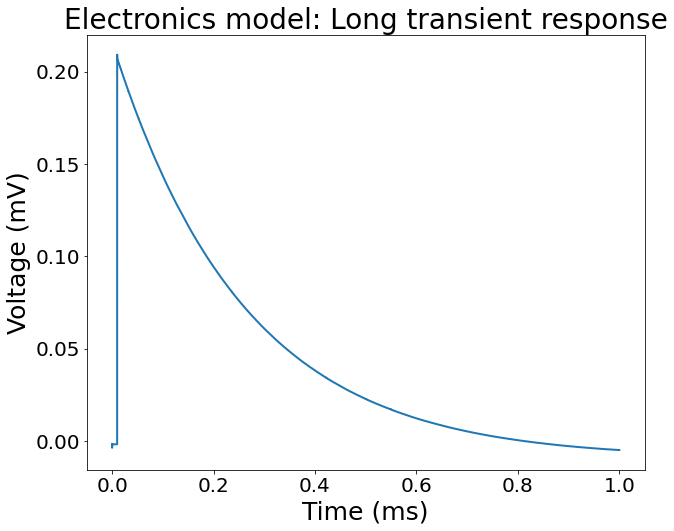

In [77]:
plt.plot(raw_time*1000, raw_impulse, lw=2)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
# plt.xlim(0.0095, 0.011)
plt.title('Electronics model: Long transient response')
plt.savefig('./plots/electronics_full.pdf', dpi=200)

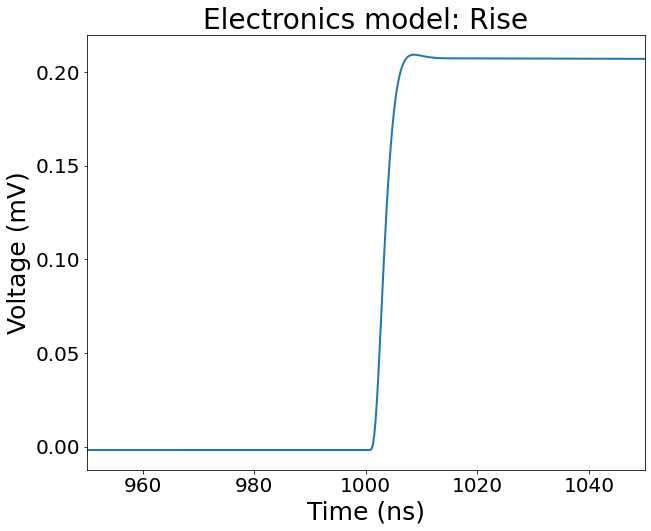

In [76]:
fig, ax = plt.subplots()
plt.plot(raw_time[3500:4500]*100000000, raw_impulse[3500:4500], lw=2)
plt.xlabel('Time (ns)')
plt.ylabel('Voltage (mV)')
# plt.xlim(9e-6, 11e-6)
plt.xlim(950, 1050)
plt.title('Electronics model: Rise')
# plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.show()
plt.savefig('./plots/electronics_rise.pdf', dpi=200)